Instructions
It's the moment to perform clustering on the songs you collected. Remember that the ultimate goal of this little project is to improve the recommendations of artists. Clustering the songs will allow the recommendation system to limit the scope of the recommendations to only songs that belong to the same cluster - songs with similar audio features.

The experiments you did with the Spotify API and the Billboard web scraping will allow you to create a pipeline such that when the user enters a song, you:

Check whether or not the song is in the Billboard Hot 200.
Collect the audio features from the Spotify API.
After that, you want to send the Spotify audio features of the submitted song to the clustering model, which should return a cluster number.

We want to have as many songs as possible to create the clustering model, so we will add the songs you collected to a bigger dataset available on Kaggle containing 160 thousand songs.

## import libraries

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

## import data set from previous lab

In [2]:
data = pd.read_csv('/Users/yuriawano/lab-api-wrappers/spotify_playlist.csv')
data

,Unnamed: 0,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Sweet Oscar,Summer,Summer,2qTZ6o9q4vxxVlGbsJCFTA,0.789,0.475,0,-17.032,1,0.0650,0.881,0.1110,0.271,169.940,116471,4
1,1,Gregory David,After Hours,The Rooftop,3QGeVTGNN77x4oQcUneQp5,0.721,0.487,2,-9.519,0,0.1440,0.855,0.2300,0.537,78.055,212309,4
2,2,Midnight Smoothie,Night Blue Skies,Night Blue Skies,69oebUHeibzbgcD1MUsSsl,0.543,0.602,1,-10.862,1,0.0646,0.867,0.1910,0.527,84.985,128442,4
3,3,Cloudchord,Low Key,Low Key,2rdlNy8ioOeyHNzcgp5lRw,0.758,0.577,8,-8.259,1,0.0921,0.650,0.1330,0.521,88.395,155091,4
4,4,So_nny,Wonderland,Wonderland,6qeMnGssbQmFZQ4NA9NPT2,0.726,0.369,0,-10.117,0,0.0490,0.840,0.1380,0.726,80.018,150000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,190,Sobremesa,Wee Hours,Wee Hours,1AmusTPVvkxMo7pTKrGWoE,0.671,0.622,2,-8.898,0,0.0401,0.849,0.0999,0.522,181.953,152417,4
191,191,Floraboros,Heat Wave,Heat Wave,0C3u3qhOe64OTvfUq0MD9M,0.763,0.425,1,-8.128,1,0.0589,0.713,0.1000,0.497,84.992,128471,4
192,192,Moe Ito,Brunch Time,Brunch Time,3K53uwXTeTZJ1e1G4aZuqU,0.890,0.407,3,-11.320,1,0.0405,0.904,0.1030,0.627,84.999,183529,4
193,193,DJ Grumble,Ft2020,HelloHello,65IGYjWJG1Esvl5vA8UTqA,0.676,0.792,2,-4.291,1,0.0377,0.346,0.1010,0.866,101.197,80405,4


## data cleaning
- drop columns [Unnamed: 0, artist, album, track_name, track_id) as they are unique names or that it occures more than one time rarely

In [3]:
data.columns

Index(['Unnamed: 0', 'artist', 'album', 'track_name', 'track_id',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature'],
      dtype='object')

In [4]:
data = data.drop(['Unnamed: 0', 'artist', 'album', 'track_name', 'track_id'], axis = 1)
data

,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.789,0.475,0,-17.032,1,0.0650,0.881,0.1110,0.271,169.940,116471,4
1,0.721,0.487,2,-9.519,0,0.1440,0.855,0.2300,0.537,78.055,212309,4
2,0.543,0.602,1,-10.862,1,0.0646,0.867,0.1910,0.527,84.985,128442,4
3,0.758,0.577,8,-8.259,1,0.0921,0.650,0.1330,0.521,88.395,155091,4
4,0.726,0.369,0,-10.117,0,0.0490,0.840,0.1380,0.726,80.018,150000,4
...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.671,0.622,2,-8.898,0,0.0401,0.849,0.0999,0.522,181.953,152417,4
191,0.763,0.425,1,-8.128,1,0.0589,0.713,0.1000,0.497,84.992,128471,4
192,0.890,0.407,3,-11.320,1,0.0405,0.904,0.1030,0.627,84.999,183529,4
193,0.676,0.792,2,-4.291,1,0.0377,0.346,0.1010,0.866,101.197,80405,4


## Data normalization / standardization

In [5]:
X = data

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      195 non-null    float64
 1   energy            195 non-null    float64
 2   key               195 non-null    int64  
 3   loudness          195 non-null    float64
 4   mode              195 non-null    int64  
 5   speechiness       195 non-null    float64
 6   instrumentalness  195 non-null    float64
 7   liveness          195 non-null    float64
 8   valence           195 non-null    float64
 9   tempo             195 non-null    float64
 10  duration_ms       195 non-null    int64  
 11  time_signature    195 non-null    int64  
dtypes: float64(8), int64(4)
memory usage: 18.4 KB


In [6]:
X_prep = StandardScaler().fit_transform(X)

pd.DataFrame(X_prep).head()


,0,1,2,3,4,5,6,7,8,9,10,11
0,0.899089,0.226134,-1.502445,-1.821881,0.984732,-0.465128,0.484643,-0.379435,-1.041371,1.513713,-0.639812,0.169476
1,0.248400,0.302590,-0.947565,0.370148,-1.015505,0.468826,0.368249,0.807739,0.148451,-0.888079,2.285689,0.169476
2,-1.454874,1.035294,-1.225005,-0.021692,0.984732,-0.469856,0.421969,0.418665,0.103721,-0.706935,-0.274392,0.169476
3,0.602451,0.876011,0.717076,0.737771,0.984732,-0.144746,-0.549475,-0.159958,0.076883,-0.617801,0.539082,0.169476
4,0.296245,-0.449229,-1.502445,0.195672,-1.015505,-0.654283,0.301098,-0.110076,0.993852,-0.836768,0.383677,0.169476


In [7]:
# fix back the columns

#columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
 #      'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
  #     'time_signature']

#X_prep.columns = columns


## Clustering

In [8]:


kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_prep)

KMeans(n_clusters=3, random_state=42)

In [9]:
clusters = kmeans.predict(X_prep)
clusters

array([0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 0, 1,
       0, 0, 2, 2, 1, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 1, 2, 0, 2, 0, 2, 0, 0, 0, 0,
       2, 0, 2, 0, 2, 2, 0, 0, 0, 1, 0, 2, 0, 0, 1, 0, 0, 2, 0, 0, 0, 2,
       2, 2, 2, 0, 0, 2, 0, 2, 2, 1, 2, 1, 0, 0, 2, 2, 2, 0, 2, 0, 0, 2,
       2, 0, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0,
       0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2,
       0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0, 2, 2, 0, 2, 0,
       2, 0, 0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [10]:
pd.Series(clusters).value_counts().sort_index()

0     86
1      8
2    101
dtype: int64

In [11]:
kmeans.inertia_

1916.0276350019412

In [12]:
kmeans = KMeans(n_clusters=3, random_state=1234, verbose=1, n_init=1)
kmeans.fit(X_prep)
kmeans.inertia_

Initialization complete
Iteration 0, inertia 2618.2394626830705
Iteration 1, inertia 2075.7893027804566
Iteration 2, inertia 2033.010453386346
Iteration 3, inertia 2006.7855650172928
Iteration 4, inertia 1996.660293961078
Iteration 5, inertia 1992.20143019706
Iteration 6, inertia 1987.5596371299487
Iteration 7, inertia 1985.1499195795905
Iteration 8, inertia 1984.278664722231
Iteration 9, inertia 1982.1948664622494
Iteration 10, inertia 1977.3550961031312
Iteration 11, inertia 1975.2561529029622
Iteration 12, inertia 1974.5815128457832
Iteration 13, inertia 1974.419195195042
Converged at iteration 13: strict convergence.


1974.419195195042

## Now choosing the BEST K :D

### Inertia

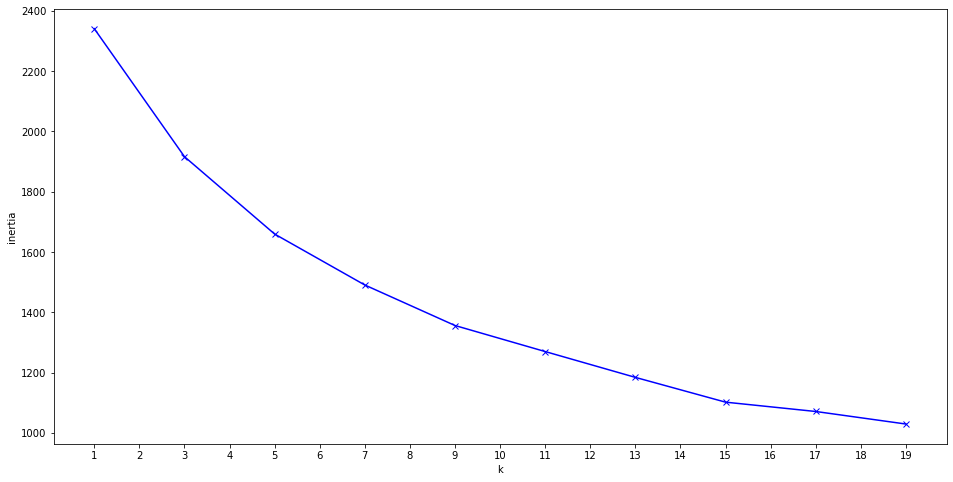

In [13]:
K = range(1, 20,2)

inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=1234)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.show()
    

## Take K = 11 and apply to the model again

In [14]:

kmeans = KMeans(n_clusters=11, random_state=42)
kmeans.fit(X_prep)

KMeans(n_clusters=11, random_state=42)

In [15]:
clusters = kmeans.predict(X_prep)
clusters

array([ 3,  0,  6,  6,  4,  5, 10,  7,  5,  9,  6,  6,  6,  4,  6,  0,  4,
        1,  8,  8,  1,  2,  9,  7,  4,  5,  2,  5,  9,  3,  1,  4, 10,  6,
        8,  8,  0,  9,  1,  3,  3,  9,  9,  6,  4,  6,  4,  6,  6,  2,  8,
        6,  9,  8,  6,  5,  2,  6, 10,  4,  9,  4, 10, 10,  9,  3,  4,  1,
        4,  0,  4,  6,  1, 10, 10,  2,  9,  5,  3,  1,  2,  3,  0,  4,  0,
        1, 10,  9,  4,  4,  6,  1,  8,  4,  8,  1,  3,  2,  4,  2, 10,  9,
        6,  4,  3, 10,  5, 10,  9,  9,  3,  1,  3,  0,  4,  8,  5,  6,  9,
        3,  4,  0,  1,  0,  6,  1,  4,  1,  9,  8,  4, 10,  0,  8,  4,  6,
        1,  0,  4,  1,  3,  5,  0,  4,  6,  6,  0,  6,  3,  6,  3,  7,  9,
        4, 10,  8, 10,  4,  5,  8,  6, 10,  1,  4,  3,  8,  3,  8,  1,  6,
        9,  4,  3,  0,  4,  1,  4,  1, 10,  1,  6,  1,  1,  5,  1,  3,  6,
       10,  1,  9,  3,  6,  6,  6,  6], dtype=int32)

In [16]:
pd.Series(clusters).value_counts().sort_index()

0     14
1     25
2      8
3     20
4     31
5     11
6     32
7      3
8     15
9     19
10    17
dtype: int64

In [17]:
kmeans.inertia_

1280.397474528488

## Silhouette Score

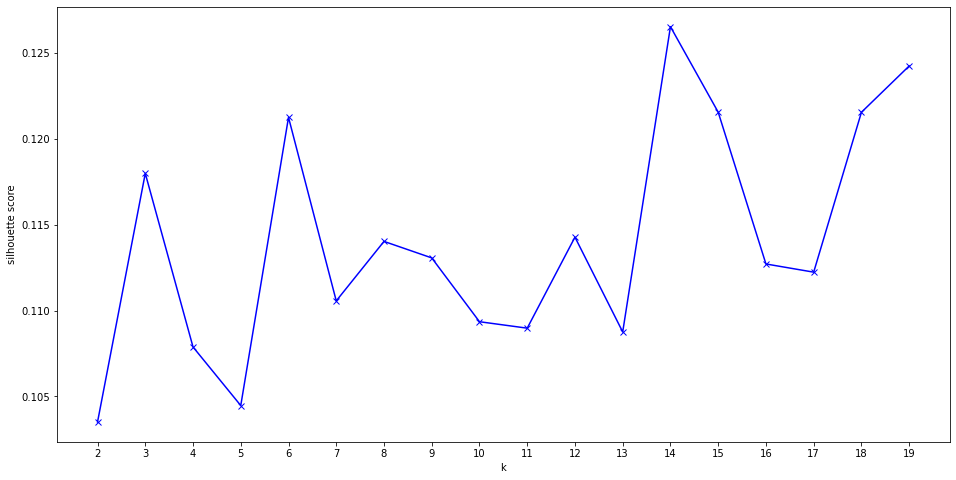

In [18]:
from sklearn.metrics import silhouette_score
K = range(2, 20)

silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.show()

## Scrapping 100 top songs from Billboard 

In [19]:
from bs4 import BeautifulSoup
import requests

In [31]:
def billboard_top_100(url):
    billboard = requests.get(url)

    soup = BeautifulSoup(billboard.content, 'html.parser')

    # song titles
    songs = soup.find_all("span", class_ ="chart-element__information__song text--truncate color--primary")

    # artists
    artists = soup.find_all("span", class_ ="chart-element__information__artist text--truncate color--secondary")

    # last week
    last_week_ranks = soup.find_all("span", class_= "chart-element__meta text--center color--secondary text--last")

    # peak rank
    peak_ranks = soup.find_all("span", class_= "chart-element__meta text--center color--secondary text--peak")

    # weeks on chart
    weeks_on_chart = soup.find_all("span", class_= "chart-element__meta text--center color--secondary text--week")

    for i in [songs, artists, last_week_ranks, peak_ranks, weeks_on_chart]:
        for j in range(len(i)):
            i[j] = i[j].getText()
        
    billboard = pd.DataFrame(
    {"songs": songs,
    "artists": artists,
    "last_week_rank": last_week_ranks,
    "peak_rank" : peak_ranks,
    "weeks_on_chart": weeks_on_chart}
    )

    return billboard



In [34]:
billboard_top_100("https://www.billboard.com/charts/hot-100")


,songs,artists,last_week_rank,peak_rank,weeks_on_chart
0,Stay,The Kid LAROI & Justin Bieber,2,1,13
1,Industry Baby,Lil Nas X & Jack Harlow,3,2,11
2,Fancy Like,Walker Hayes,5,3,16
3,Way 2 Sexy,Drake Featuring Future & Young Thug,4,1,5
4,Bad Habits,Ed Sheeran,6,2,15
...,...,...,...,...,...
95,Esta Danada,Ivan Cornejo,-,96,1
96,Whiskey And Rain,Michael Ray,-,97,1
97,TSU,Drake,84,9,5
98,Love All,Drake Featuring JAY-Z,87,10,5


## Check whether or not the song is in the Billboard Hot 200.


In [48]:
def hot_recommender():
    # import scraping function & random int generator
    
    from random import randint
    
    # scrape billboard hot 100
    billboard = billboard_top_100("https://www.billboard.com/charts/hot-100")
    
    # ask for song
    song = input("What song do you like? ")
    
    # check if song is on billboard hot 100
    song_row = billboard[billboard["songs"].str.contains(song)]
    if len(song_row) == 0:
        return "Your song is not hot"
    else:
        check_song = input("Did you mean " + song_row["songs"].values[0] + " by " + song_row["artists"].values[0] + "? ")    
    
        # if song is in billboard hot 100, recommend another random hot song
        if check_song == "yes" or "Yes":
            print("That's a hot song.")
            random_song = randint(0, len(billboard)-1)
            return("You might also like " + billboard["songs"][random_song] + " by " + billboard["artists"][random_song])
        else:
            return("Ah, not the one I had in mind.")

In [49]:
hot_recommender()

What song do you like? Stay
Did you mean Stay by The Kid LAROI & Justin Bieber? Yes
That's a hot song.


'You might also like You Should Probably Leave by Chris Stapleton'

## Collect the audio features from the Spotify API.


## After that, you want to send the Spotify audio features of the submitted song to the clustering model, which should return a cluster number.

## questions to TAs

8. --> is the result of Silhouette looks up and down because of the small number of data I have in my dataset??

12. and 13. --> I am not sure if we touched this in class. Can we get the solutions uploaded for this? thanks in advance :-D
